# Michaelis Menten

Reactions are:


X1 + X2 -> X3

X3 -> X1 + X2

X3 -> X2 + X4

In [1]:
import pints
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np
import math

Specify initial concentration, time points at which to record concentration values, and rate constant value (k)

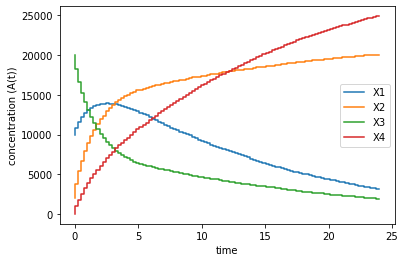

In [20]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

values = model.simulate(k, times)

plt.step(times, values[:,0], label = 'X1')
plt.step(times, values[:,1], label = 'X2')
plt.step(times, values[:,2], label = 'X3')
plt.step(times, values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Given the stochastic nature of this model we can use multiple simulations to make sure that the runs are similar.

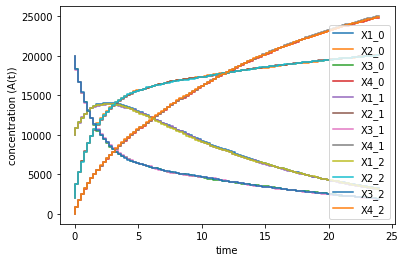

In [30]:
for i in range(3):
    values = model.simulate(k, times)
    plt.step(times, values[:,0], label = 'X1_' + str(i))
    plt.step(times, values[:,1], label = 'X2_' + str(i))
    plt.step(times, values[:,2], label = 'X3_' + str(i))
    plt.step(times, values[:,3], label = 'X4_' + str(i))

plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Another way of obtaining these simulations is by using tau-leaping for more efficient but approximate solutions.

In [6]:
values_approx = model.simulate(k, times, approx_tau=0.0125)

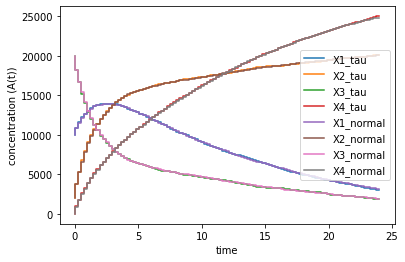

In [32]:
plt.step(times, values_approx[:,0], label = 'X1_tau')
plt.step(times, values_approx[:,1], label = 'X2_tau')
plt.step(times, values_approx[:,2], label = 'X3_tau')
plt.step(times, values_approx[:,3], label = 'X4_tau')
plt.step(times, values[:,0], label = 'X1_normal')
plt.step(times, values[:,1], label = 'X2_normal')
plt.step(times, values[:,2], label = 'X3_normal')
plt.step(times, values[:,3], label = 'X4_normal')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

We can also run multiple simulations using tau leaping.

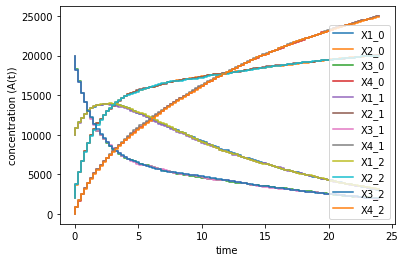

In [33]:
for i in range(3):
    values = model.simulate(k, times, approx_tau=0.0125)
    plt.step(times, values[:,0], label = 'X1_' + str(i))
    plt.step(times, values[:,1], label = 'X2_' + str(i))
    plt.step(times, values[:,2], label = 'X3_' + str(i))
    plt.step(times, values[:,3], label = 'X4_' + str(i))

plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

For tau-leaping, we may try multiple values to find the best performing approximate tau value.

In [34]:
taus = [0.0125, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
approx_mses = []

# compute empirical mean
empirical_mean = sum([model.simulate(k, times) for i in range(30)])/30

# compute exact mean squared error
exact_mse = 0
for i in range(25):
    exact = model.simulate(k, times)
    exact_mse += np.square(exact - empirical_mean).mean() / 25

for tau in taus:
    amse = 0
    print("Running for tau = " + str(tau))
    for i in range(1000):
        sim = model.simulate(k, times, approx_tau=tau)
        amse = np.square(empirical_mean - sim).mean() / 1000 
    approx_mses.append(amse)

Running for tau = 0.0125
Running for tau = 0.025
Running for tau = 0.05
Running for tau = 0.1
Running for tau = 0.25
Running for tau = 0.5
Running for tau = 1


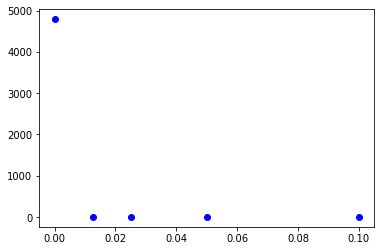

In [37]:
plt.plot([0]+taus[:4], [exact_mse]+approx_mses[:4], 'bo')

Here ends the jupyter notebook, remove the rest

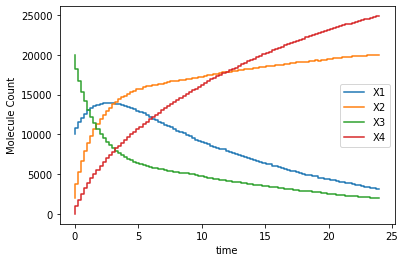

In [8]:
plot_output(values_exact)

In [9]:
def mc_estimate_approx(n,tau):
    return sum([model.simulate(k, times, approx_tau=tau) for i in range(n)])

In [10]:
def mse(r1,r2):
    return np.square(r1 - r2).mean()

In [11]:
model.simulate(k, times)

array([[10000.,  2000., 20000.,     0.],
       [10860.,  3810., 18190.,   950.],
       [11568.,  5312., 16688.,  1744.],
       [12207.,  6752., 15248.,  2545.],
       [12724.,  8009., 13991.,  3285.],
       [13116.,  9079., 12921.,  3963.],
       [13439., 10020., 11980.,  4581.],
       [13663., 10819., 11181.,  5156.],
       [13796., 11488., 10512.,  5692.],
       [13904., 12045.,  9955.,  6141.],
       [13918., 12516.,  9484.,  6598.],
       [13935., 12958.,  9042.,  7023.],
       [13881., 13324.,  8676.,  7443.],
       [13842., 13700.,  8300.,  7858.],
       [13776., 14023.,  7977.,  8247.],
       [13710., 14324.,  7676.,  8614.],
       [13621., 14564.,  7436.,  8943.],
       [13518., 14796.,  7204.,  9278.],
       [13427., 15045.,  6955.,  9618.],
       [13230., 15197.,  6803.,  9967.],
       [13071., 15356.,  6644., 10285.],
       [12933., 15519.,  6481., 10586.],
       [12740., 15636.,  6364., 10896.],
       [12562., 15772.,  6228., 11210.],
       [12388., 

In [14]:
model.simulate(k, times, approx_tau=0.0125)

array([[10000.,  2000., 20000.,     0.],
       [10843.,  3798., 18202.,   955.],
       [11578.,  5414., 16586.,  1836.],
       [12160.,  6773., 15227.,  2613.],
       [12623.,  7957., 14043.,  3334.],
       [13040.,  8983., 13017.,  3943.],
       [13335.,  9904., 12096.,  4569.],
       [13599., 10693., 11307.,  5094.],
       [13765., 11394., 10606.,  5629.],
       [13861., 11953., 10047.,  6092.],
       [13939., 12501.,  9499.,  6562.],
       [13952., 12961.,  9039.,  7009.],
       [13988., 13429.,  8571.,  7441.],
       [13911., 13747.,  8253.,  7836.],
       [13840., 14051.,  7949.,  8211.],
       [13747., 14344.,  7656.,  8597.],
       [13659., 14656.,  7344.,  8997.],
       [13482., 14823.,  7177.,  9341.],
       [13313., 15005.,  6995.,  9692.],
       [13147., 15168.,  6832., 10021.],
       [12972., 15323.,  6677., 10351.],
       [12838., 15516.,  6484., 10678.],
       [12624., 15602.,  6398., 10978.],
       [12500., 15815.,  6185., 11315.],
       [12324., 

In [15]:
empirical_mean = sum([model.simulate(k, times) for i in range(30)])/30

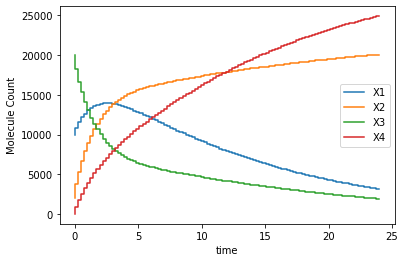

In [16]:
plot_output(empirical_mean)

In [17]:
exact_mse = 0
for i in range(25):
    exact = model.simulate(k, times)
    exact_mse += mse(exact, empirical_mean)/25

In [18]:
taus = [0.0125, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
approx_mses = []

for tau in taus:
    amse = 0
    print("Running for tau = " + str(tau))
    for i in range(1000):
        sim = model.simulate(k, times, approx_tau=tau)
        amse = mse(empirical_mean, sim)/1000
    approx_mses.append(amse)

Running for tau = 0.0125
Running for tau = 0.025
Running for tau = 0.05
Running for tau = 0.1
Running for tau = 0.25
Running for tau = 0.5
Running for tau = 1


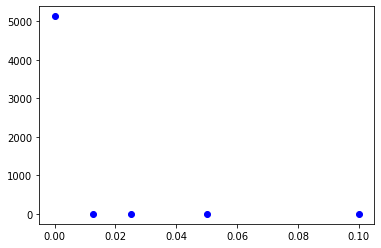

In [19]:
plt.plot([0]+taus[:4], [exact_mse]+approx_mses[:4], 'bo')